In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import io
%cd "C:\Users\Sanja\OneDrive\Desktop\House"

C:\Users\Sanja\OneDrive\Desktop\House


In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

### Data Cleaning

In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
# Temporarily add Dependent variable to test data for concatenation

test['SalePrice']='test'

In [8]:
# Concat both the Dataframes for Preprocessing

houseprice=pd.concat([train,test],axis=0)

In [9]:
# Check for missing values
pd.set_option('display.max_rows',82)
houseprice.isnull().sum().sort_values(ascending=False)/houseprice.shape[0]

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
LotFrontage      0.166495
GarageFinish     0.054471
GarageQual       0.054471
GarageCond       0.054471
GarageYrBlt      0.054471
GarageType       0.053786
BsmtExposure     0.028092
BsmtCond         0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MasVnrArea       0.007879
MSZoning         0.001370
Functional       0.000685
Utilities        0.000685
BsmtHalfBath     0.000685
BsmtFullBath     0.000685
GarageArea       0.000343
BsmtFinSF1       0.000343
SaleType         0.000343
GarageCars       0.000343
BsmtUnfSF        0.000343
Electrical       0.000343
Exterior2nd      0.000343
Exterior1st      0.000343
KitchenQual      0.000343
TotalBsmtSF      0.000343
BsmtFinSF2       0.000343
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
Id               0.000000
BedroomAbvGr     0.000000
PavedDrive  

In [10]:
# Split data into objcols and numeric cols for missing values imputation

objcols=houseprice.select_dtypes(include=['object'])
numcols=houseprice.select_dtypes(include=np.number)

In [11]:
# objcols missing values 
objcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [12]:
objcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [13]:
nacols=[['PoolQC', 'Fence', 'MiscFeature','Alley','FireplaceQu']]
for col in nacols:
    objcols[col]=objcols[col].fillna('Missing')

In [14]:
# Selecting colums with similar names

garagecols=objcols[[x for x in objcols.columns
                      if "Garage" in x]]

In [15]:
# printing Frequency counts of Multiple variables
for col in garagecols.columns:
    freq=garagecols[col].value_counts(dropna=False)
    print(freq)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64
Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64
TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64
TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64


In [16]:
# Selecting colums with similar names

Bsmtcols=objcols[[x for x in objcols.columns
                    if "Bsmt" in x]]

In [17]:
# printing Frequency counts of Multiple variables 

for col in Bsmtcols.columns:
    freq=Bsmtcols[col].value_counts(dropna=False)
    print(freq)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64
TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64
No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [18]:
# After going through Data Description NA in BsmtCols &
# GarageCols means NoGarage or NoBasement

for col in garagecols.columns:
    objcols[col]=objcols[col].fillna('No')

In [19]:
for col in Bsmtcols.columns:
    objcols[col]=objcols[col].fillna('No')

In [20]:
# Remaining variables very few missing values - most_frequent
# imputation can be done

for col in objcols:
    objcols[col]=objcols[col].fillna(objcols[col].value_counts().idxmax())

In [21]:
# numcols missing values imputation

numcols.isnull().sum().sort_values(ascending=False)/numcols.shape[0]

LotFrontage      0.166495
GarageYrBlt      0.054471
MasVnrArea       0.007879
BsmtHalfBath     0.000685
BsmtFullBath     0.000685
BsmtFinSF2       0.000343
GarageCars       0.000343
GarageArea       0.000343
TotalBsmtSF      0.000343
BsmtUnfSF        0.000343
BsmtFinSF1       0.000343
KitchenAbvGr     0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
Id               0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
MSSubClass       0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
LotArea          0.000000
YrSold           0.000000
dtype: float64

In [22]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [23]:
# Extract catcols from numcols

catcols=numcols[['OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']]

In [24]:
numcols=numcols.drop(['Id','OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold'],axis=1)

In [25]:
numcols.LotFrontage=numcols.LotFrontage.fillna(9999)

In [26]:
# Remaining variables very few missing values - mean, median()
# imputation can be done

numcols.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,...,2919.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,1722.553957,10168.114080,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,...,0.597122,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,42.517628,3699.751694,7886.996359,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,...,0.646129,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7478.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,...,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,73.000000,9453.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,95.000000,11570.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,...,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,9999.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,...,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [27]:
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [28]:
# Concat both the Dataframes for EDA

df=pd.concat([objcols,catcols,numcols],axis=1)

In [29]:
# Split back to train and test for EDA - EDA must be done on train data

train_df=df[df.SalePrice!='test']
test_df=df[df.SalePrice=='test']

### Exploratory Data Analysis
        #Univariate Analysis

SKEWNESS : 1.8828757597682129
KURTOSIS : 6.536281860064529


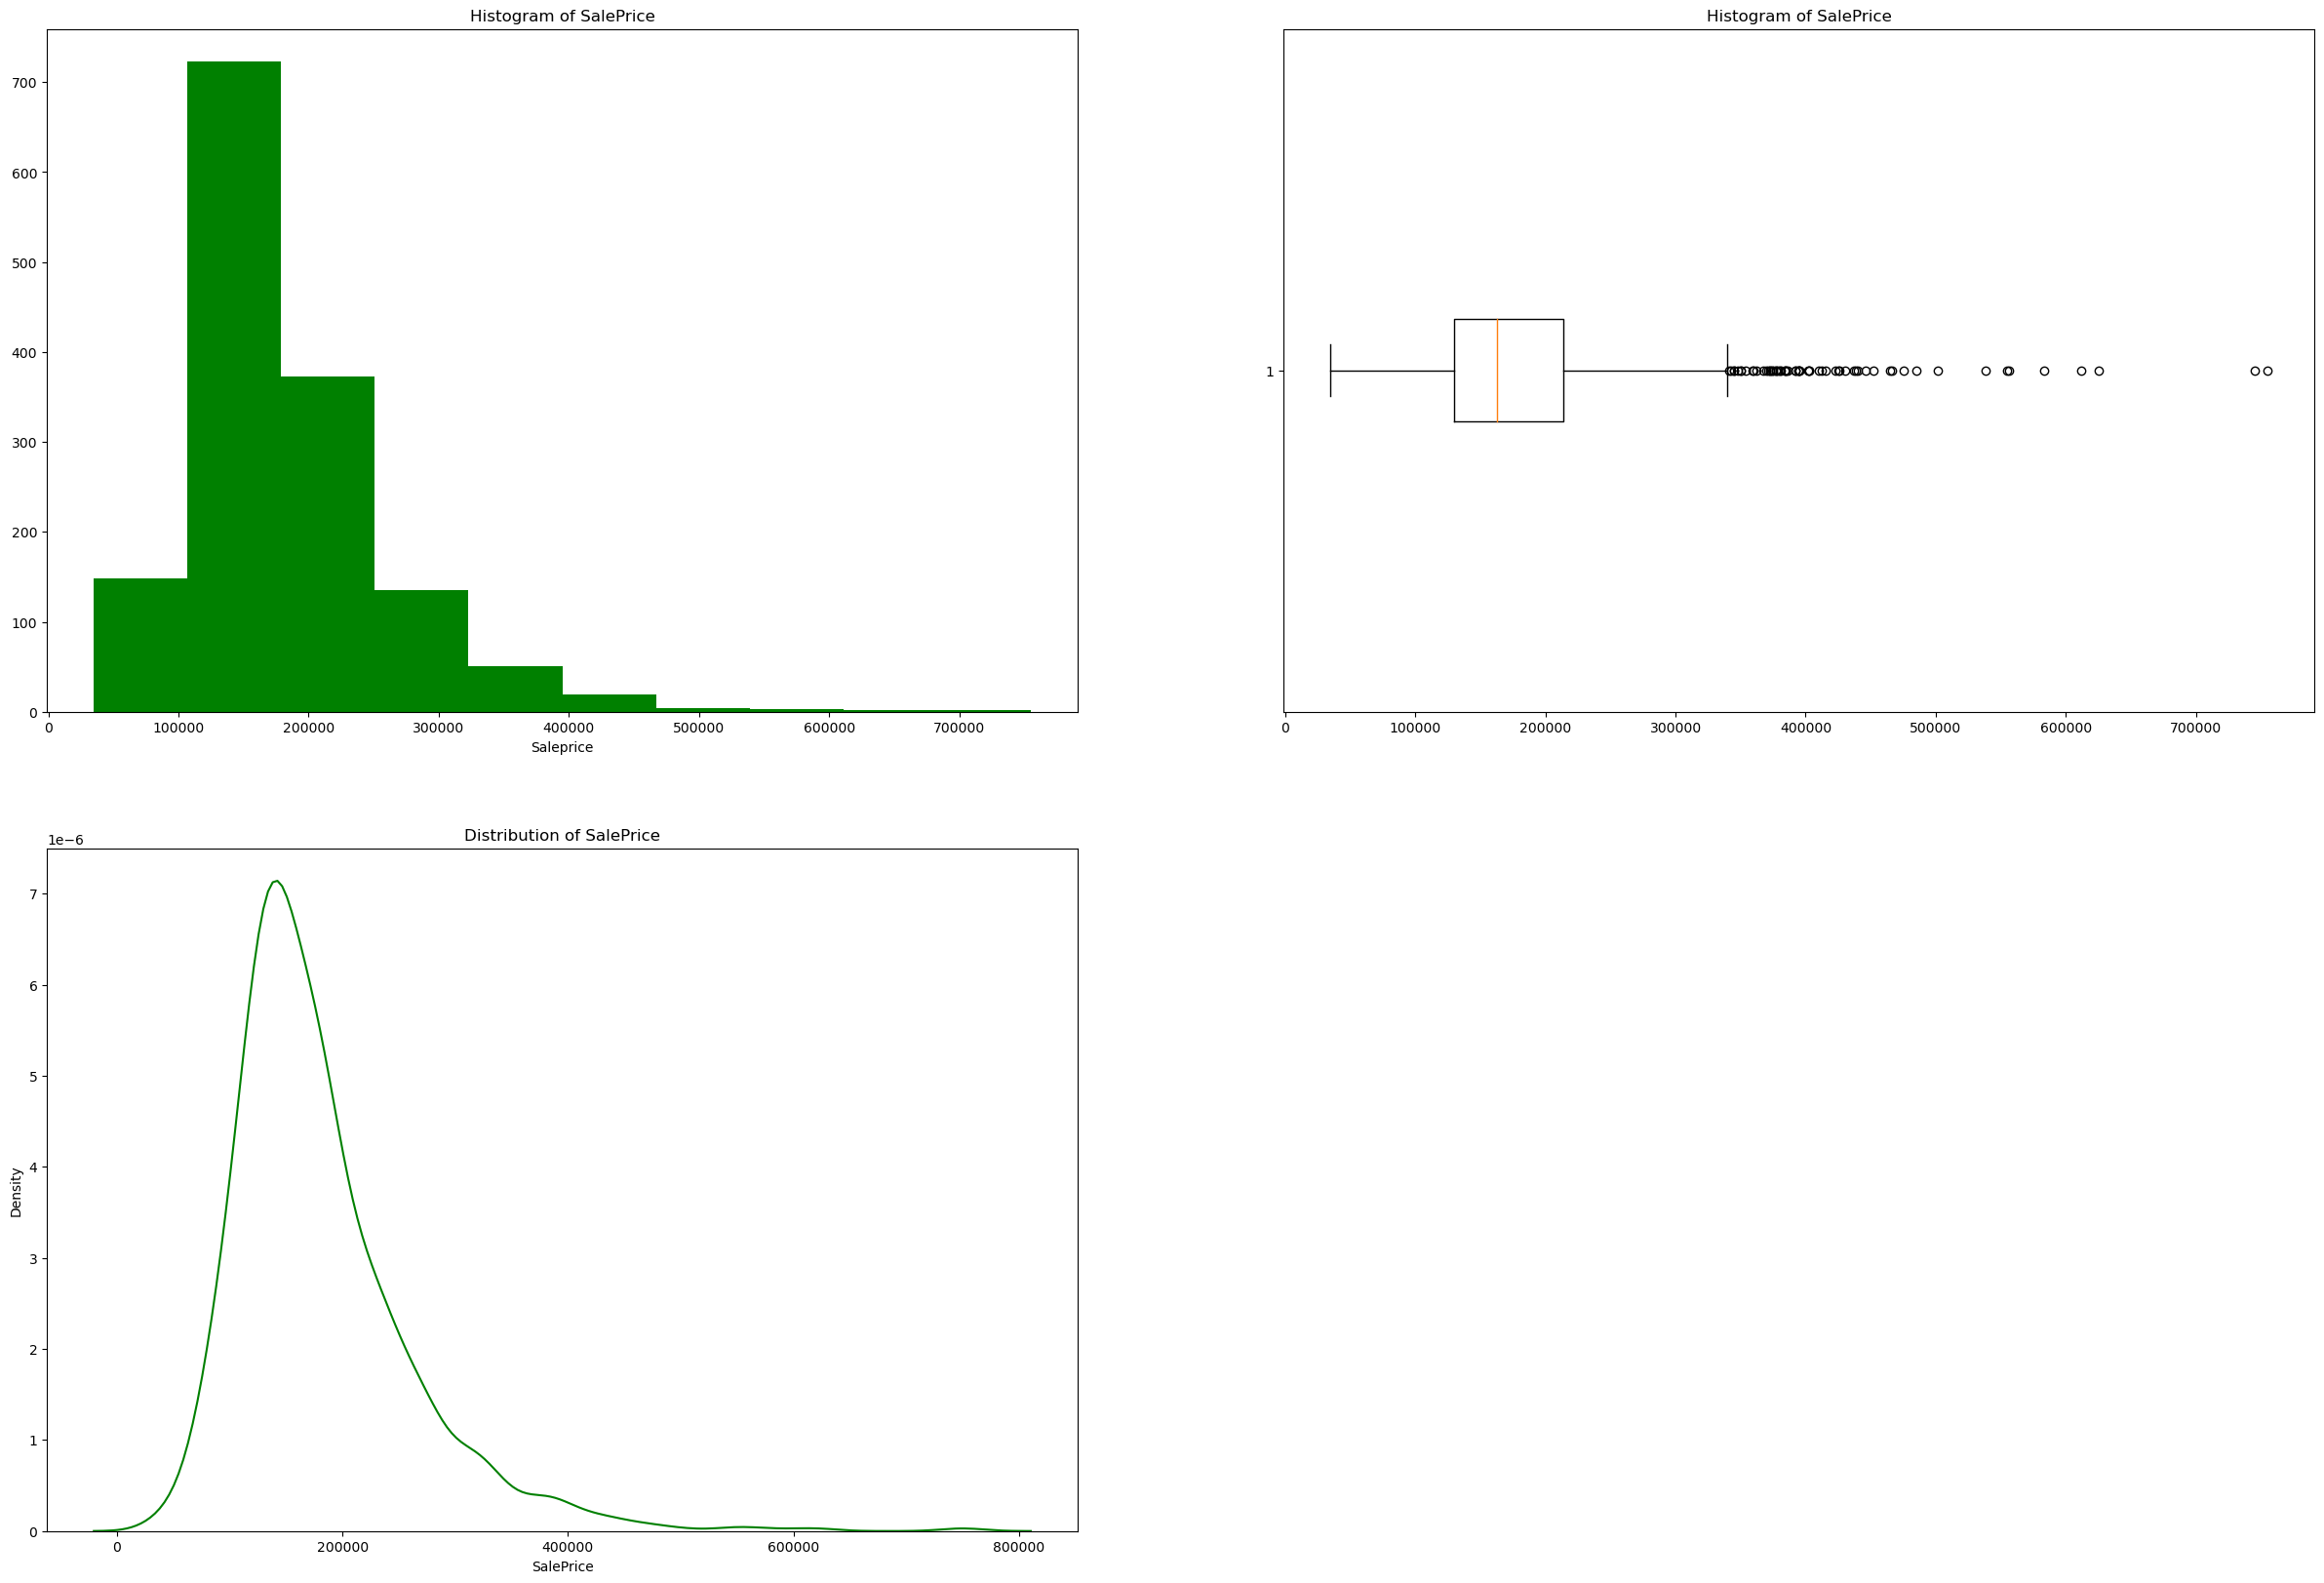

In [30]:
# Histogram, Boxplot, Density Curve of SalePrice

plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.hist(train_df['SalePrice'], color='Green')
plt.title('Histogram of SalePrice')
plt.xlabel('Saleprice')

plt.subplot(2,2,2)
plt.boxplot(train_df['SalePrice'], vert=False)
plt.title('Histogram of SalePrice')

plt.subplot(2,2,3)
sns.kdeplot(train_df['SalePrice'], color='Green')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')

print("SKEWNESS :",train_df.SalePrice.skew())
print("KURTOSIS :",train_df.SalePrice.kurt())

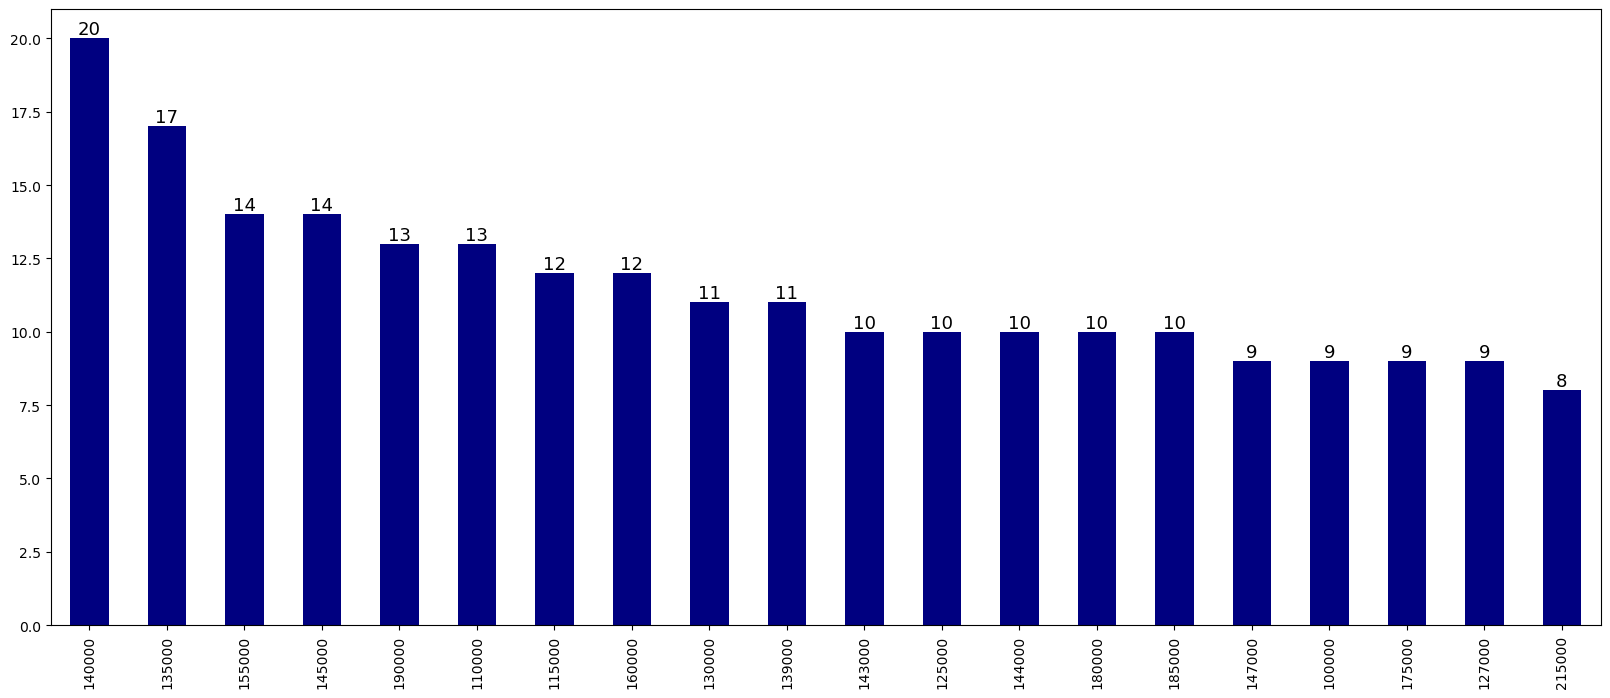

In [31]:
# What is SalePrice for Different Streets
plt.figure(figsize=(20,8))
ax=train_df.SalePrice.value_counts().nlargest(20).sort_values(
    ascending=False).plot(kind='bar', color='Navy')

for i in ax.containers:
    ax.bar_label(i,fontsize=13)

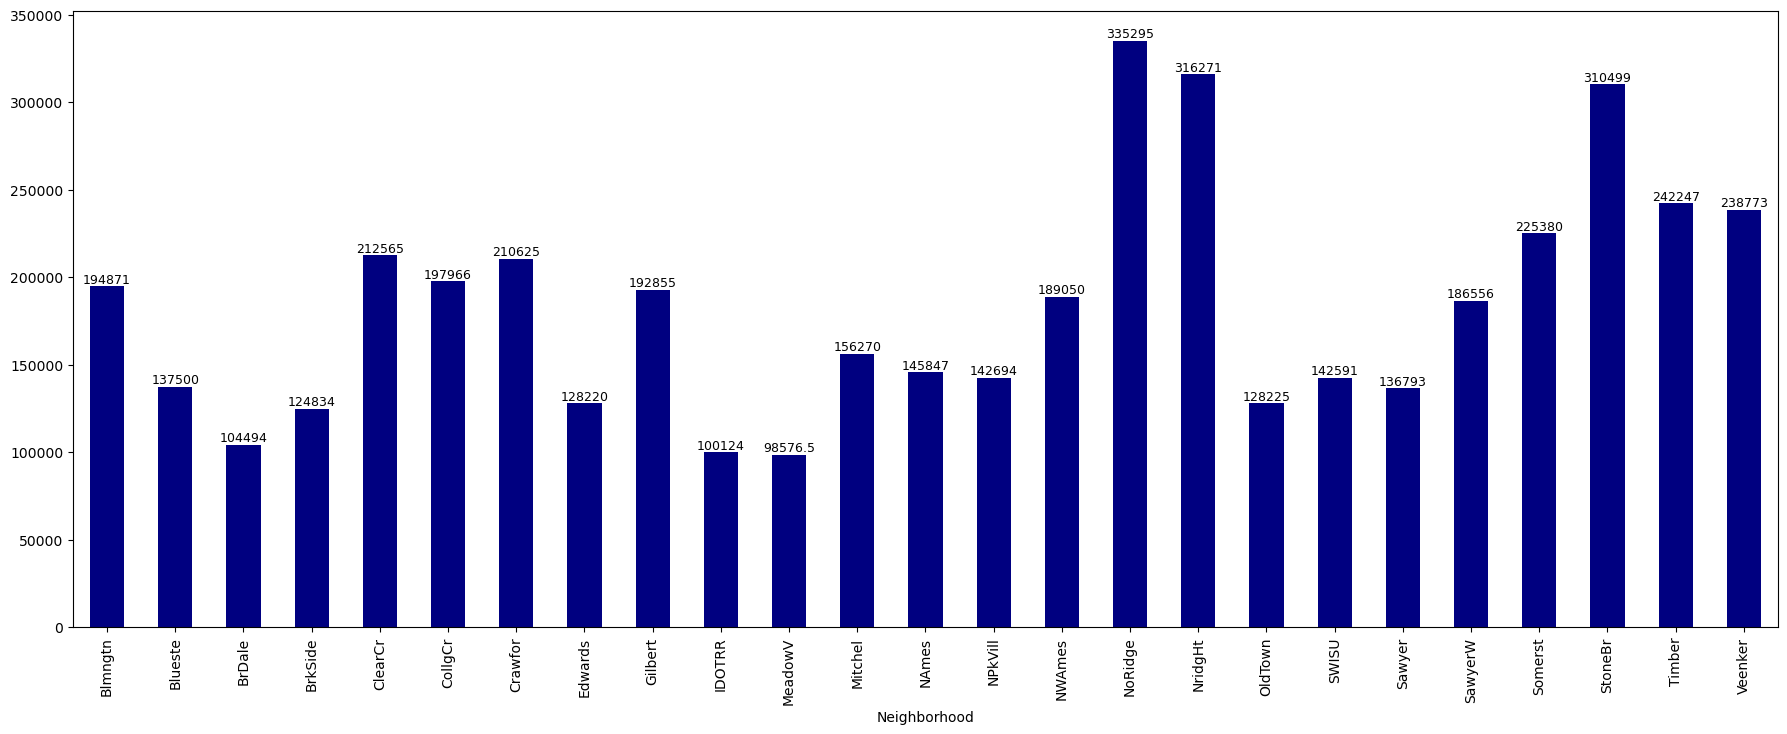

In [32]:
# What is Average Saleprice for Neighborhood

plt.figure(figsize=(22,8))
ax=train_df.SalePrice.groupby(train_df.Neighborhood).mean().plot(kind='bar', color=['Navy'])
for i in ax.containers:
    ax.bar_label(i,fontsize=9)

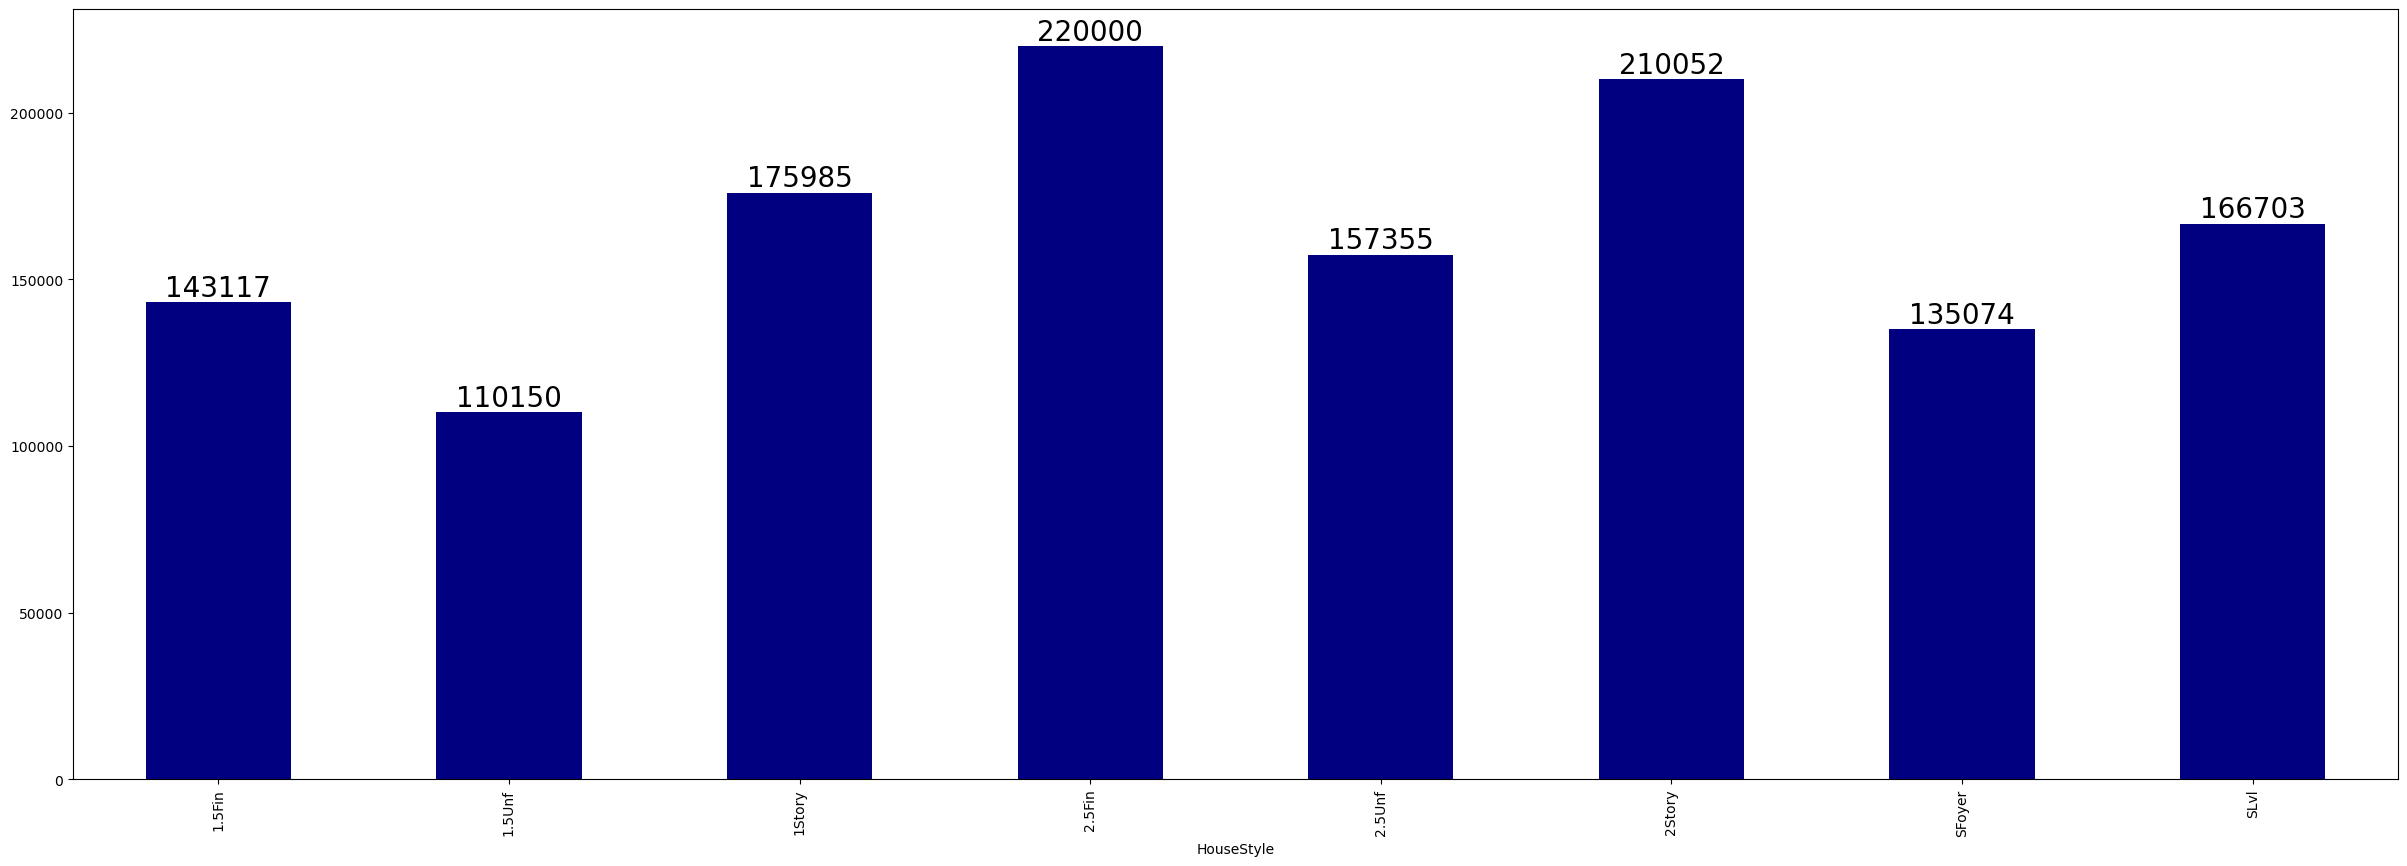

In [33]:
# What is Average Saleprice for HouseStyle

plt.figure(figsize=(30,10))
ax=train_df.SalePrice.groupby(train_df.HouseStyle).mean().plot(kind='bar', color=['Navy'])
for i in ax.containers:
    ax.bar_label(i,fontsize=20)

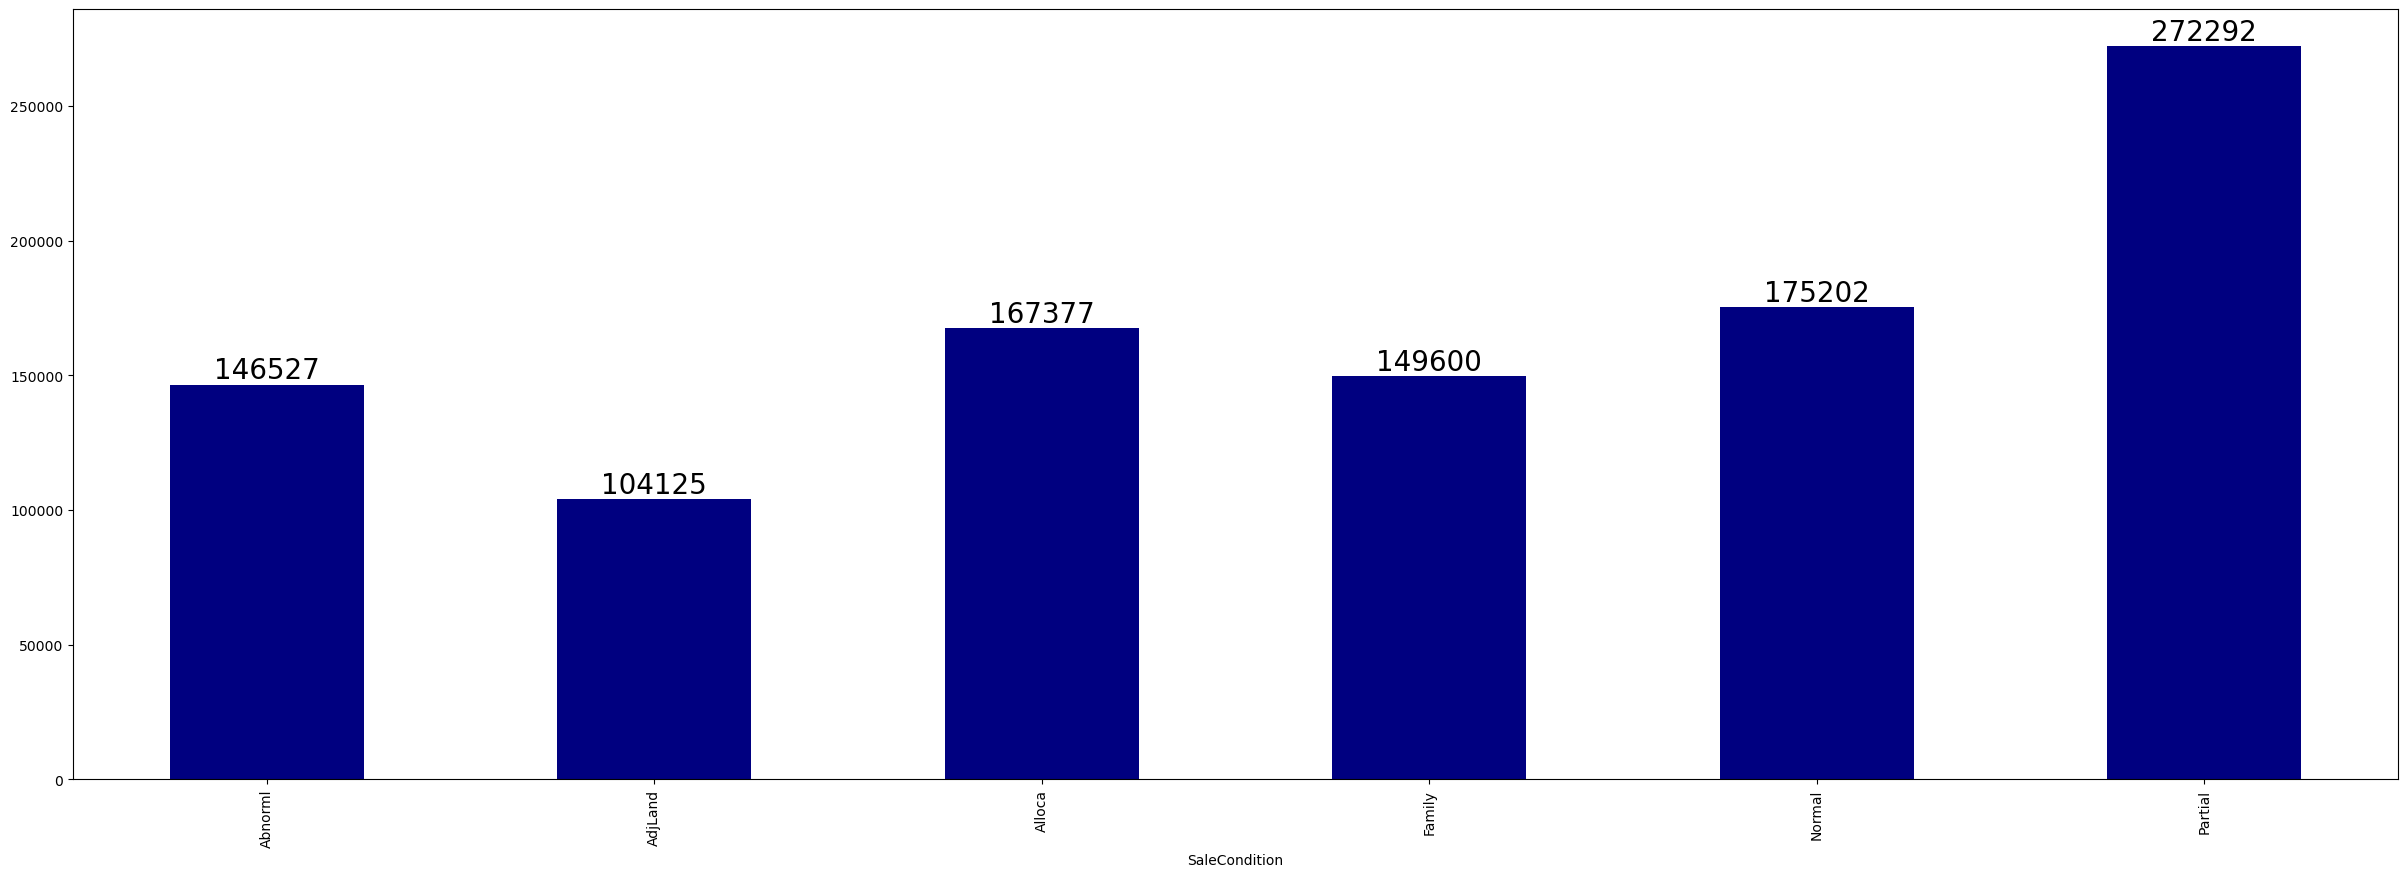

In [34]:
# What is Average Saleprice for SaleCondition

plt.figure(figsize=(30,10))
ax=train_df.SalePrice.groupby(train_df.SaleCondition).mean().plot(kind='bar', color=['Navy'])
for i in ax.containers:
    ax.bar_label(i,fontsize=20)

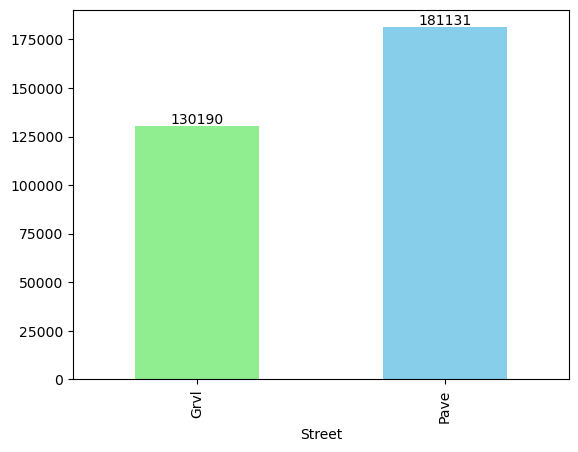

In [35]:
# What is the Average SalePrice for different Steet

ax=train_df.SalePrice.groupby(
    train_df.Street).mean().plot(kind='bar', color=['lightgreen','skyblue'])
for i in ax.containers:
    ax.bar_label(i, fontsize=10)

###    
    #Bivariate Analysis

<AxesSubplot: >

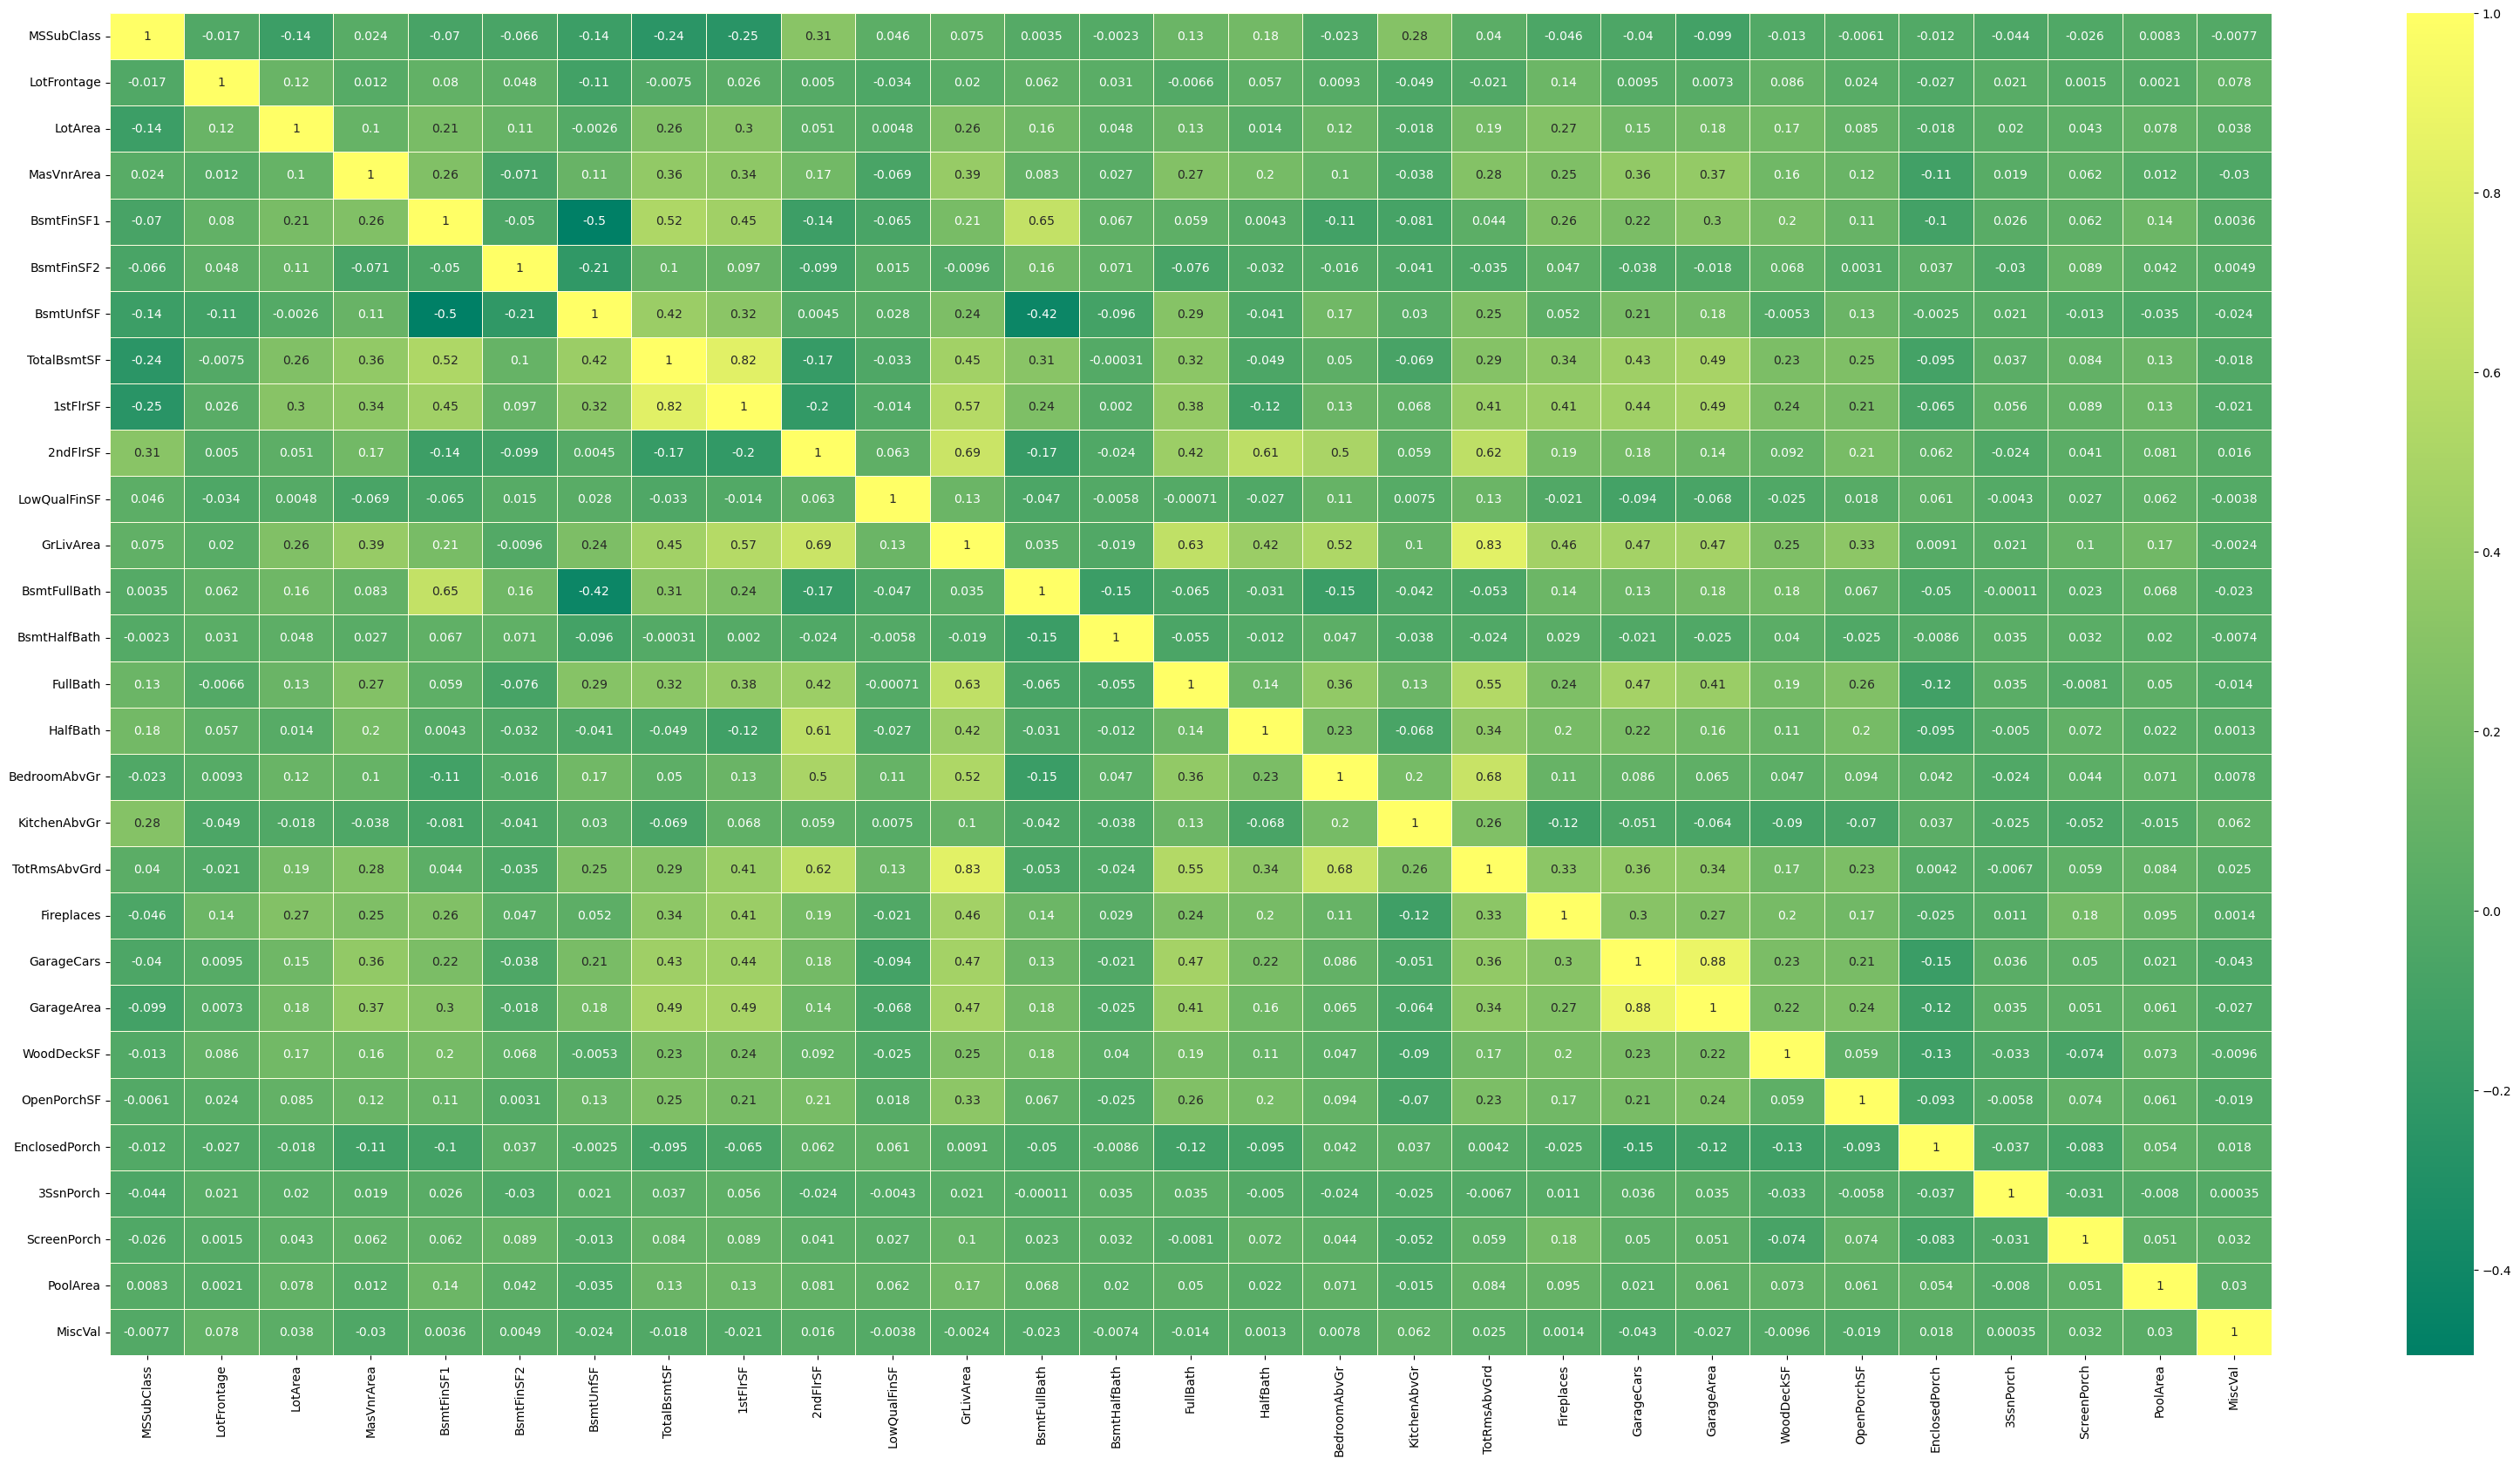

In [36]:
# Correlation Analysis

plt.figure(figsize=(40,20))
sns.heatmap(train_df[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].corr(),
            annot=True, linewidths=0.5, linecolor='lightyellow', cmap='summer')

Text(0.5, 1.0, 'TotalBsmtSF Vs 1stFlrSF Correlation')

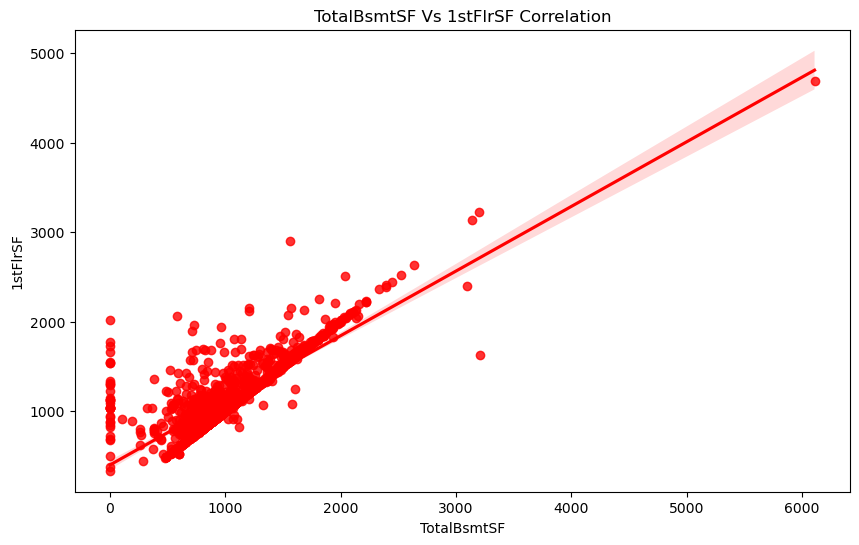

In [37]:
plt.figure(figsize=(10,6))
sns.regplot(train_df, x='TotalBsmtSF', y='1stFlrSF', color='red')
plt.title('TotalBsmtSF Vs 1stFlrSF Correlation')

Text(0.5, 1.0, '2ndFlrSF Vs GrLivArea Correlation')

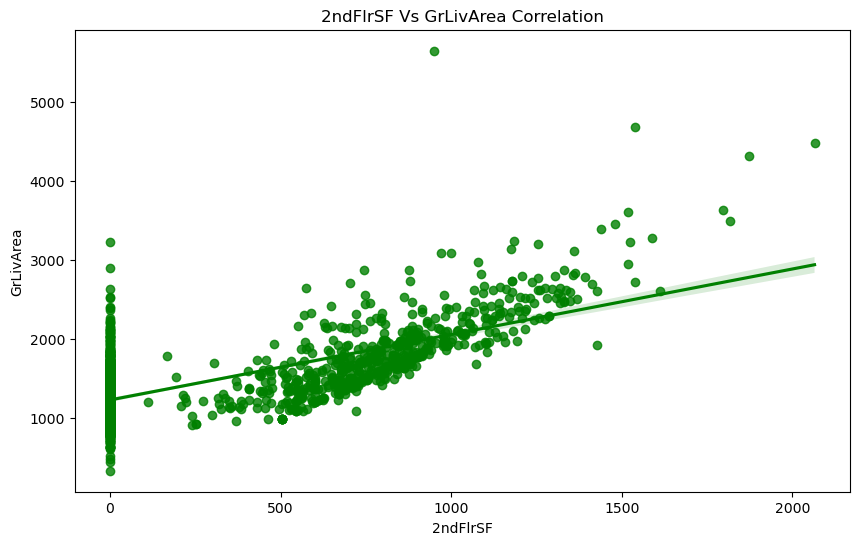

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(train_df, x='2ndFlrSF', y='GrLivArea', color='green')
plt.title('2ndFlrSF Vs GrLivArea Correlation')

Text(0.5, 1.0, 'GrLivArea Vs 1stFlrSF Correlation')

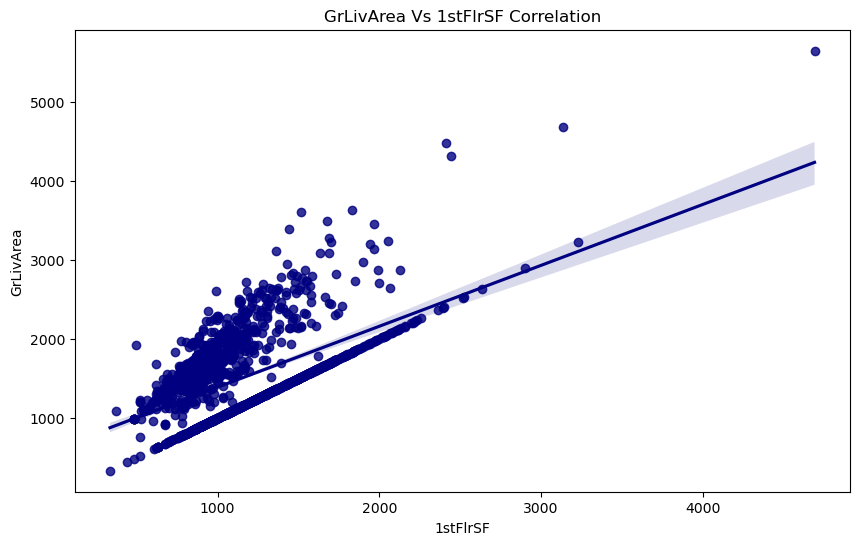

In [39]:

plt.figure(figsize=(10,6))
sns.regplot(train_df, x='1stFlrSF', y='GrLivArea', color='Navy')
plt.title('GrLivArea Vs 1stFlrSF Correlation')

Text(0.5, 1.0, 'GarageArea Vs TotalBsmtSF Correlation')

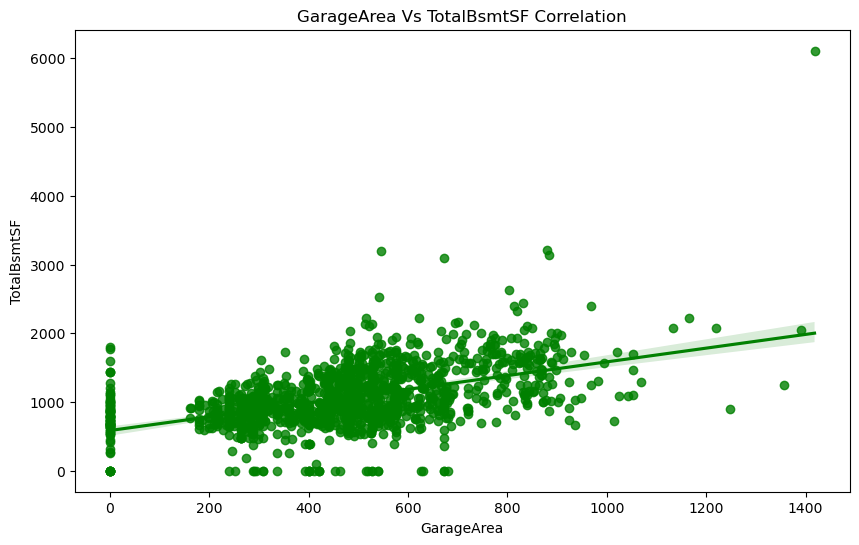

In [40]:

plt.figure(figsize=(10,6))
sns.regplot(train_df, x='GarageArea', y='TotalBsmtSF', color='Green')
plt.title('GarageArea Vs TotalBsmtSF Correlation')

Text(0.5, 1.0, 'TotalBsmtSF Vs BsmtFinSF1 Correlation')

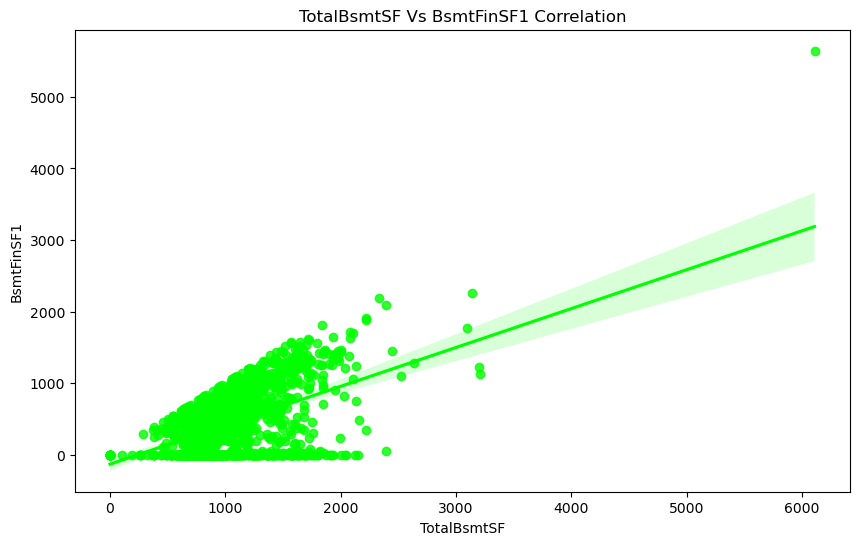

In [41]:

plt.figure(figsize=(10,6))
sns.regplot(train_df, x='TotalBsmtSF', y='BsmtFinSF1', color='lime')
plt.title('TotalBsmtSF Vs BsmtFinSF1 Correlation')

Text(0.5, 1.0, 'TotalBsmtSF Vs BsmtFinSF1 Correlation')

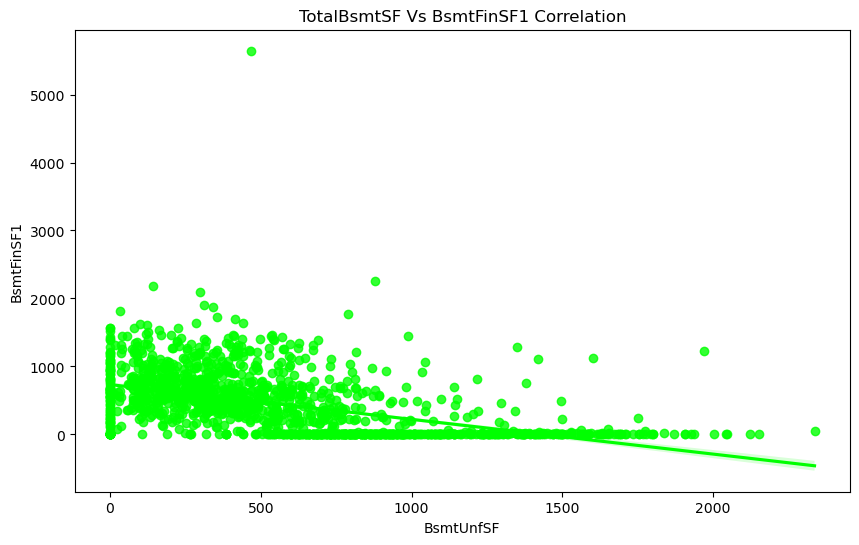

In [42]:

plt.figure(figsize=(10,6))
sns.regplot(train_df, x='BsmtUnfSF', y='BsmtFinSF1', color='lime')
plt.title('TotalBsmtSF Vs BsmtFinSF1 Correlation')

### Data Transformation 

In [43]:
objcols.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal,208500
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal,181500
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal,223500
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml,140000
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal,250000


In [44]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [45]:
numcols['SalePrice']=objcols.SalePrice

In [46]:
objcols=objcols.drop('SalePrice',axis=1)

In [47]:
objcols_enocde=objcols.apply(LabelEncoder().fit_transform)

In [48]:
objcols_enocde.shape

(2919, 43)

In [49]:
catcols_encode=catcols.apply(LabelEncoder().fit_transform)

In [50]:
# numcols 

numcols.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,60,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,...,2.0,548.0,0,61,0,0,0,0,0,208500
1,20,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,...,2.0,460.0,298,0,0,0,0,0,0,181500
2,60,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,...,2.0,608.0,0,42,0,0,0,0,0,223500
3,70,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,...,3.0,642.0,0,35,272,0,0,0,0,140000
4,60,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,...,3.0,836.0,192,84,0,0,0,0,0,250000


In [51]:
objcols_enocde['SalePrice']=numcols.SalePrice

In [52]:
numcols=numcols.drop('SalePrice',axis=1)

In [53]:
numcols_scaled=StandardScaler().fit_transform(numcols)

In [54]:
# convert Back to Dataframe 
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [55]:
numcols_scaled.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0.067331,-0.448094,-0.217879,0.529034,0.580959,-0.293025,-0.934782,-0.444278,-0.773861,1.207379,...,-0.924311,0.306418,0.348888,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
1,-0.873616,-0.444039,-0.072044,-0.567016,1.178162,-0.293025,-0.629818,0.477158,0.261075,-0.785025,...,0.623632,0.306418,-0.059804,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
2,0.067331,-0.447283,0.137197,0.338903,0.097928,-0.293025,-0.288441,-0.299027,-0.610718,1.235375,...,0.623632,0.306418,0.627542,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592
3,0.302568,-0.449446,-0.078385,-0.567016,-0.494884,-0.293025,-0.047201,-0.671232,-0.506205,0.978742,...,0.623632,1.619830,0.785446,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592
4,0.067331,-0.442958,0.518903,1.390216,0.468984,-0.293025,-0.160994,0.211621,-0.037170,1.671651,...,0.623632,1.619830,1.686426,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592


In [56]:
numcols_scaled=numcols_scaled.reset_index()

In [57]:
catcols_encode=catcols_encode.reset_index()

In [58]:
objcols_enocde=objcols_enocde.reset_index()

In [59]:
# Concat all three Dataframes into 1 Dataframe

cleandf=pd.concat([numcols_scaled,objcols_enocde,catcols_encode],axis=1)

In [60]:
cleandf.head()

,index,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleCondition,SalePrice,index,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,0,0.067331,-0.448094,-0.217879,0.529034,0.580959,-0.293025,-0.934782,-0.444278,-0.773861,...,4,208500,0,6,4,110,53,94,1,2
1,1,-0.873616,-0.444039,-0.072044,-0.567016,1.178162,-0.293025,-0.629818,0.477158,0.261075,...,4,181500,1,5,7,83,26,67,4,1
2,2,0.067331,-0.447283,0.137197,0.338903,0.097928,-0.293025,-0.288441,-0.299027,-0.610718,...,4,223500,2,6,4,108,52,92,8,2
3,3,0.302568,-0.449446,-0.078385,-0.567016,-0.494884,-0.293025,-0.047201,-0.671232,-0.506205,...,0,140000,3,6,4,25,20,89,1,0
4,4,0.067331,-0.442958,0.518903,1.390216,0.468984,-0.293025,-0.160994,0.211621,-0.037170,...,4,250000,4,7,4,107,50,91,11,2


In [61]:
cleandf=cleandf.drop('index',axis=1)

In [62]:
# split back to train and test

housetrain_df=cleandf[cleandf.SalePrice!='test']
housetest_df=cleandf[cleandf.SalePrice=='test']

In [63]:
housetrain_df.tail()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType,SaleCondition,SalePrice,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
1455,0.067331,-0.448905,-0.285470,-0.567016,-0.969133,-0.293025,0.892725,-0.224132,-0.526598,0.834095,...,8,4,175000,5,4,106,50,90,7,1
1456,-0.873616,-0.442688,0.381311,0.098443,0.765389,0.670616,0.064316,1.112631,2.328397,-0.785025,...,8,4,210000,5,5,85,38,69,1,4
1457,0.302568,-0.447824,-0.142806,-0.567016,-0.365344,-0.293025,0.719760,0.227508,0.072441,1.902620,...,8,4,266500,6,8,50,56,33,4,4
1458,-0.873616,-0.447283,-0.057207,-0.567016,-0.861549,5.790328,-1.276159,0.059561,-0.207960,-0.785025,...,8,4,142125,4,5,57,46,41,3,4
1459,-0.873616,-0.445391,-0.029308,-0.567016,0.853213,1.421428,-0.966644,0.463541,0.245780,-0.785025,...,8,4,147500,4,5,72,15,56,5,2


In [64]:
housetest_df.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType,SaleCondition,SalePrice,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
1460,-0.873616,-0.444039,0.184371,-0.567016,0.058407,0.558290,-0.661680,-0.385270,-0.671897,-0.785025,...,8,4,test,4,5,68,11,52,5,4
1461,-0.873616,-0.443769,0.519791,0.036930,1.057404,-0.293025,-0.352165,0.629217,0.431865,-0.785025,...,8,4,test,5,5,65,8,49,5,4
1462,0.067331,-0.445661,0.464374,-0.567016,0.767585,-0.293025,-0.964368,-0.280871,-0.590326,0.850426,...,8,4,test,4,4,104,48,88,2,4
1463,0.067331,-0.444580,-0.024109,-0.455174,0.352617,-0.293025,-0.538784,-0.285410,-0.595424,0.796766,...,8,4,test,5,5,105,48,89,5,4
1464,1.478753,-0.454042,-0.654748,-0.567016,-0.391691,-0.293025,1.038379,0.518010,0.306959,-0.785025,...,8,4,test,7,4,99,42,83,0,4


In [65]:
housetest_df=housetest_df.drop('SalePrice',axis=1)

In [66]:
# split data into X and y

y=housetrain_df.SalePrice
X=housetrain_df.drop('SalePrice',axis=1)

<AxesSubplot: ylabel='Frequency'>

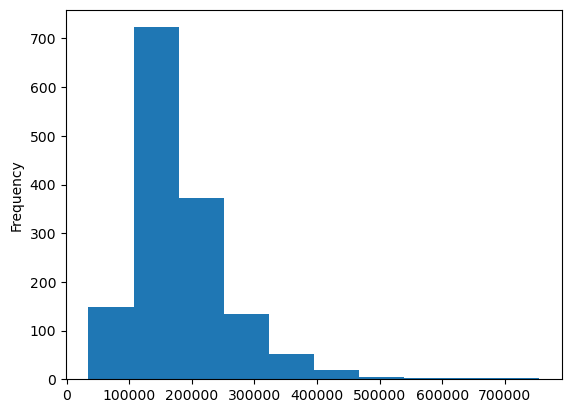

In [67]:
y.plot(kind='hist')

In [68]:
y=y.astype("int64")

In [69]:
y.dtype

dtype('int64')

In [70]:
y=np.log1p(y)

C:\Users\Sanja\AppData\Local\Temp\ipykernel_6620\3569613644.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color='lime')


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

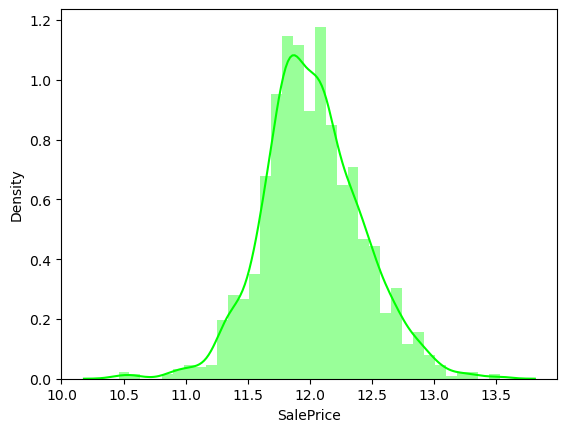

In [71]:
sns.distplot(y, color='lime')

### Multiple Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
reg=LinearRegression()

In [74]:
regmodel=reg.fit(X,y)

In [75]:
regmodel.score(X,y)

0.88725495231439

In [76]:
regpredict=regmodel.predict(X)

In [77]:
regresid=y-regpredict

In [78]:
regresid

0       0.015737
1      -0.101039
2       0.044382
3      -0.128408
4      -0.169285
          ...   
1455    0.012796
1456   -0.006822
1457    0.167922
1458   -0.022083
1459   -0.034707
Name: SalePrice, Length: 1460, dtype: float64

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
cross_val_score(reg,X,y)

array([0.89676851, 0.86278725, 0.88598775, 0.88302887, 0.74838202])

In [81]:
np.mean([0.89676851, 0.86278725, 0.88598775, 0.88302887, 0.74838202])

0.8553908800000001

In [82]:
regtestpred=regmodel.predict(housetest_df)

In [83]:
pd.DataFrame(np.exp(regtestpred)).to_csv("reg.csv")

In [84]:
np.sqrt(np.mean(regresid**2))

0.13407925581017463

### DecisionTree

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
tree=DecisionTreeRegressor(max_depth=8)

In [87]:
treemodel=tree.fit(X,y)

In [88]:
treemodel.score(X,y)

0.9467208954557936

In [89]:
treepredict=treemodel.predict(X)

In [90]:
residual=y-treepredict

In [91]:
residual

0       0.068038
1       0.031263
2       0.137510
3       0.017055
4      -0.095691
          ...   
1455   -0.037679
1456    0.144641
1457   -0.001219
1458    0.093457
1459   -0.037239
Name: SalePrice, Length: 1460, dtype: float64

In [92]:
# RMSE

np.sqrt(np.mean(residual**2))

0.09217036599755793

### ENSEMBLE METHODS

In [93]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [94]:
RF=RandomForestRegressor(n_estimators=1000)

In [95]:
RFmodel=RF.fit(X,y)

In [96]:
RFmodel.score(X,y)

0.9832401622222544

In [97]:
RFpredict=RFmodel.predict(X)

In [98]:
rfresidual=y-RFpredict

In [99]:
rfresidual

0       0.008280
1       0.031297
2       0.015958
3      -0.109660
4      -0.065942
          ...   
1455   -0.002545
1456    0.025769
1457    0.022339
1458    0.028756
1459   -0.006725
Name: SalePrice, Length: 1460, dtype: float64

In [100]:
np.sqrt(np.mean(rfresidual**2))

0.051694907055018544

In [101]:
gbm=GradientBoostingRegressor(n_estimators=1000)

In [102]:
gbmmodel=gbm.fit(X,y)

In [103]:
gbmmodel.score(X,y)

0.9971220407132689

In [104]:
gbmpredict=gbmmodel.predict(X)

In [105]:
gbmresidual=y-gbmpredict

In [106]:
np.sqrt(np.mean(gbmresidual**2))

0.021421761334601497

### Gradient Boosting

In [107]:
gbm=GradientBoostingRegressor(n_estimators=200)

In [108]:
gbmmodel=gbm.fit(X,y)

In [109]:
gbmmodel.score(X,y)

0.9715974033310764

In [110]:
gbmpredict=gbmmodel.predict(X)

In [111]:
gbmresidual=y-gbmpredict

In [112]:
gbmresidual

0       0.033699
1       0.070784
2       0.066722
3      -0.054074
4      -0.133743
          ...   
1455   -0.000707
1456   -0.003062
1457    0.015127
1458   -0.023376
1459    0.005847
Name: SalePrice, Length: 1460, dtype: float64

In [113]:
np.sqrt(np.mean(gbmresidual**2))

0.06729640688132833

### Cat Boost

In [114]:
from catboost import CatBoostRegressor

In [115]:
cat=CatBoostRegressor(iterations=1000,learning_rate=0.01,depth=5)

In [116]:
catmodel=cat.fit(X,y)

0:	learn: 0.3968557	total: 148ms	remaining: 2m 27s
1:	learn: 0.3944180	total: 150ms	remaining: 1m 14s
2:	learn: 0.3920966	total: 151ms	remaining: 50.3s
3:	learn: 0.3894259	total: 153ms	remaining: 38.1s
4:	learn: 0.3867840	total: 155ms	remaining: 30.9s
5:	learn: 0.3843943	total: 157ms	remaining: 26s
6:	learn: 0.3819460	total: 159ms	remaining: 22.5s
7:	learn: 0.3794995	total: 161ms	remaining: 19.9s
8:	learn: 0.3769583	total: 162ms	remaining: 17.9s
9:	learn: 0.3747274	total: 164ms	remaining: 16.3s
10:	learn: 0.3724008	total: 166ms	remaining: 14.9s
11:	learn: 0.3700433	total: 168ms	remaining: 13.8s
12:	learn: 0.3678382	total: 169ms	remaining: 12.8s
13:	learn: 0.3656960	total: 171ms	remaining: 12s
14:	learn: 0.3634976	total: 172ms	remaining: 11.3s
15:	learn: 0.3612957	total: 174ms	remaining: 10.7s
16:	learn: 0.3591572	total: 176ms	remaining: 10.2s
17:	learn: 0.3569782	total: 177ms	remaining: 9.68s
18:	learn: 0.3548808	total: 179ms	remaining: 9.24s
19:	learn: 0.3528618	total: 181ms	remaining

In [117]:
catmodel.score(X,y)

0.9430443275048663

In [118]:
catpredict=catmodel.predict(X)

In [119]:
catresid=y-catpredict

In [120]:
catresid

0       0.019383
1       0.066428
2       0.027152
3      -0.164690
4      -0.213611
          ...   
1455    0.029261
1456    0.015654
1457    0.060650
1458    0.056927
1459   -0.011364
Name: SalePrice, Length: 1460, dtype: float64

In [121]:
np.mean(np.sqrt(catresid**2))

0.06889569195988778